This notebook is for observations data. It contains basic visualisations of the standardised anomalies and the actual vs predicted plots for station Vleiland. 

# Load obs training data - reforecasts 

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="ecmwflibs")
warnings.filterwarnings("ignore", category=UserWarning, module="xarray.backends.cfgrib_")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="xarray.backends.plugins")

import xarray as xr
obs_belgium = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_reforecasts_observations_surface_belgium.nc")
obs_austria = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_reforecasts_observations_surface_austria.nc")
obs_france = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_reforecasts_observations_surface_france.nc")
obs_netherlands = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_reforecasts_observations_surface_netherlands.nc")
obs_germany = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_reforecasts_observations_surface_germany.nc")

In [2]:
obs_belgium

<xarray.Dataset>
Dimensions:       (station_id: 29, step: 21, time: 209, year: 20)
Coordinates:
    altitude      (station_id) float64 ...
    land_usage    (station_id) int8 ...
    latitude      (station_id) float64 ...
    longitude     (station_id) float64 ...
  * station_id    (station_id) int64 6472 6479 6400 6494 ... 6407 6438 6418 6484
    station_name  (station_id) object ...
  * step          (step) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:00:00
  * time          (time) datetime64[ns] 2017-01-02 2017-01-05 ... 2018-12-31
  * year          (year) int64 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
Data variables:
    t2m           (time, year, step, station_id) float64 ...
    tcc           (time, year, step, station_id) float64 ...
    vis           (time, year, step, station_id) float64 ...
Attributes:
    comment:                
    full_dataset_metadata:  
    history:                Gathered and compiled by Jonathan Demaeyer (RMIB).
    land usage history:     Retrieved from https://land.copernicus.eu/pan-eur...
    land usage legend:      {1: {'label': '111 - Continuous urban fabric', 'n...
    land usage source:      European Union, Copernicus Land Monitoring Servic...
    source:                 Royal Meteorological Institute of Belgium (RMIB),...

# Subset extraction

Similar subset for training and test datasets. Both for 1 ensemble member, 1 step time and 1 year period from 1st January 2017 to 31st December 2017

In [3]:

def subsets_mean(dataset):
    
    import numpy as np
    import xarray as xr
    import numpy as np

    fcs_tr_new = dataset["t2m"]
    fcs_tr_new["year"] = len(fcs_tr_new["year"]) + 1 - fcs_tr_new["year"]
    fcs_tr_new_mean = fcs_tr_new.mean(dim=["year"], keep_attrs=True)
    doy1 =[]
    for i in fcs_tr_new_mean['time'].values:
        doy1.append(pd.Period(i,freq='D').dayofyear)
    fcs_tr_new_mean = fcs_tr_new_mean.assign_coords(doy=('time',doy1)) 

    start_date = np.datetime64('2017-01-01') 
    end_date = np.datetime64('2017-12-31')  

    subset_mu = fcs_tr_new_mean.sel(
    time=(fcs_tr_new_mean.time >= start_date) & 
                    (fcs_tr_new_mean.time <= end_date)
        )
    subset_mu = subset_mu.sel(station_id=subset_mu.station_id[:])
    subset_mu = subset_mu.isel(step=slice(2, 3))
    return (subset_mu)

def susbets_std_dev(dataset):
    import numpy as np
    import xarray as xr
    import numpy as np

    fcs_tr_new = dataset["t2m"]
    fcs_tr_new["year"] = len(fcs_tr_new["year"]) + 1 - fcs_tr_new["year"]
    fcs_tr_new_std = fcs_tr_new.std(dim=["year"], keep_attrs=True)
    
    doy2 = []
    for i in fcs_tr_new_std['time'].values:
        doy2.append(pd.Period(i,freq='D').dayofyear)
    fcs_tr_new_std = fcs_tr_new_std.assign_coords(doy=('time',doy2)) 
    start_date = np.datetime64('2017-01-01') 
    end_date = np.datetime64('2017-12-31')  

    subset_std = fcs_tr_new_std.sel(
    time=(fcs_tr_new_std.time >= start_date) & 
                    (fcs_tr_new_std.time <= end_date)
        )
    subset_std = subset_std.sel(station_id=subset_std.station_id[:])
    subset_std = subset_std.isel(step=slice(2, 3))
    return (subset_std)
    
def test_subset(dataset):
    
    import numpy as np
    import xarray as xr
    import numpy as np
    
    doy =[]
    for i in dataset['time'].values:
        doy.append(pd.Period(i,freq='D').dayofyear)
    dataset = dataset.assign_coords(doy=('time',doy)) 

    start_date = np.datetime64('2017-01-01') 
    end_date = np.datetime64('2017-12-31')  

    subset_test = dataset.sel(
    time=(dataset.time >= start_date) & 
                    (dataset.time <= end_date)
        )
    subset_test = subset_test.sel(station_id=subset_test.station_id[:])
    subset_test = subset_test.isel(step=slice(2, 3))
    return (subset_test)


In [4]:
import pandas as pd
subset_belgium_mu = subsets_mean(obs_belgium)
subset_austria_mu = subsets_mean(obs_austria)
subset_france_mu = subsets_mean(obs_france)
subset_netherlands_mu = subsets_mean(obs_netherlands)
subset_germany_mu = subsets_mean(obs_germany)

subset_belgium_std = susbets_std_dev(obs_belgium)
subset_austria_std = susbets_std_dev(obs_austria)
subset_france_std = susbets_std_dev(obs_france)
subset_netherlands_std = susbets_std_dev(obs_netherlands)
subset_germany_std = susbets_std_dev(obs_germany)

D:\anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [5]:
subset_belgium_std

<xarray.DataArray 't2m' (time: 104, step: 1, station_id: 29)>
array([[[4.28629448, 5.12516097, 4.9876723 , ..., 0.79490565,
         3.19353686, 3.57199826]],

       [[3.45465983, 3.86988515, 3.87846297, ..., 2.28746585,
         3.48602879, 3.59511503]],

       [[5.08078338, 5.59678479, 4.92218447, ..., 2.3252688 ,
         4.54161656, 4.64236983]],

       ...,

       [[3.08089915, 3.61627917, 3.5471115 , ..., 1.55743379,
         4.03776444, 3.68348749]],

       [[3.95347926, 3.27641572, 3.42116939, ..., 1.24835892,
         2.78612634, 3.84275757]],

       [[4.33185175, 3.69201842, 3.2155054 , ..., 4.67358535,
         3.16819042, 4.22765284]]])
Coordinates:
    altitude      (station_id) float64 295.3 55.2 4.7 673.2 ... 4.0 12.1 323.9
    land_usage    (station_id) int8 12 6 6 36 20 12 11 6 ... 12 20 2 6 18 44 12
    latitude      (station_id) float64 50.19 51.17 51.09 ... 51.32 51.35 49.62
    longitude     (station_id) float64 5.255 5.463 2.652 ... 4.364 3.202 5.587
  * station_id    (station_id) int64 6472 6479 6400 6494 ... 6407 6438 6418 6484
    station_name  (station_id) object 'Humain' 'Kleine-Brogel' ... 'Buzenol'
  * step          (step) timedelta64[ns] 12:00:00
  * time          (time) datetime64[ns] 2017-01-02 2017-01-05 ... 2017-12-28
    doy           (time) int32 2 5 9 12 16 19 23 ... 341 345 348 352 355 359 362

In [6]:
subset_belgium_mu = subset_belgium_mu.to_dataframe()
subset_austria_mu = subset_austria_mu.to_dataframe()
subset_france_mu = subset_france_mu.to_dataframe()
subset_netherlands_mu = subset_netherlands_mu.to_dataframe()
subset_germany_mu = subset_germany_mu.to_dataframe()

subset_belgium_std = subset_belgium_std.to_dataframe()
subset_austria_std = subset_austria_std.to_dataframe()
subset_france_std = subset_france_std.to_dataframe()
subset_netherlands_std = subset_netherlands_std.to_dataframe()
subset_germany_std = subset_germany_std.to_dataframe()


In [7]:
combined_obs_mean = pd.concat([subset_belgium_mu, subset_austria_mu, subset_france_mu, subset_netherlands_mu, subset_germany_mu], axis=0)
combined_obs_std_dev = pd.concat([subset_belgium_std, subset_austria_std, subset_france_std, subset_netherlands_std, subset_germany_std], axis=0)

combined_obs_mean = combined_obs_mean.dropna()
combined_obs_std_dev = combined_obs_std_dev.dropna()

# Load test data obs

In [8]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="ecmwflibs")
warnings.filterwarnings("ignore", category=UserWarning, module="xarray.backends.cfgrib_")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="xarray.backends.plugins")

import xarray as xr
obs_belgium_test = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_forecasts_observations_surface_belgium.nc")
obs_austria_test = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_forecasts_observations_surface_austria.nc")
obs_france_test = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_forecasts_observations_surface_france.nc")
obs_netherlands_test = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_forecasts_observations_surface_netherlands.nc")
obs_germany_test = xr.open_dataset("C:/Users/Lalitha Gorthi/OneDrive/Desktop/aDissertation/EUPPBenchfiles/stations_forecasts_observations_surface_germany.nc")

In [9]:
subset_belgium_test = test_subset(obs_belgium_test)
subset_austria_test = test_subset(obs_austria_test)
subset_france_test = test_subset(obs_france_test)
subset_netherlands_test = test_subset(obs_netherlands_test)
subset_germany_test = test_subset(obs_germany_test)

subset_belgium_test = subset_belgium_test.to_dataframe()
subset_austria_test = subset_austria_test.to_dataframe()
subset_france_test = subset_france_test.to_dataframe()
subset_netherlands_test = subset_netherlands_test.to_dataframe()
subset_germany_test = subset_germany_test.to_dataframe()

combined_obs_test = pd.concat([subset_belgium_test, subset_austria_test, subset_france_test, subset_netherlands_test, subset_germany_test], axis=0)
combined_obs_test = combined_obs_test.dropna()

In [10]:
combined_obs_test

altitude  land_usage   latitude  \
station_id step            time                                          
6479       0 days 12:00:00 2017-01-01      55.2           6  51.168831   
                           2017-01-02      55.2           6  51.168831   
                           2017-01-03      55.2           6  51.168831   
                           2017-01-04      55.2           6  51.168831   
                           2017-01-05      55.2           6  51.168831   
...                                         ...         ...        ...   
5906       0 days 12:00:00 2017-12-27      98.0          12  49.506200   
                           2017-12-28      98.0          12  49.506200   
                           2017-12-29      98.0          12  49.506200   
                           2017-12-30      98.0          12  49.506200   
                           2017-12-31      98.0          12  49.506200   

                                       longitude   station_name     t2m  \
station_id step            time                                           
6479       0 days 12:00:00 2017-01-01   5.462697  Kleine-Brogel  270.75   
                           2017-01-02   5.462697  Kleine-Brogel  273.75   
                           2017-01-03   5.462697  Kleine-Brogel  274.75   
                           2017-01-04   5.462697  Kleine-Brogel  278.25   
                           2017-01-05   5.462697  Kleine-Brogel  276.65   
...                                          ...            ...     ...   
5906       0 days 12:00:00 2017-12-27   8.558500       Mannheim  279.65   
                           2017-12-28   8.558500       Mannheim  277.35   
                           2017-12-29   8.558500       Mannheim  277.05   
                           2017-12-30   8.558500       Mannheim  280.45   
                           2017-12-31   8.558500       Mannheim  286.25   

                                         tcc      vis  doy  
station_id step            time                             
6479       0 days 12:00:00 2017-01-01  0.875   8000.0    1  
                           2017-01-02  0.250   1100.0    2  
                           2017-01-03  0.875   9000.0    3  
                           2017-01-04  0.875  15000.0    4  
                           2017-01-05  0.250  20000.0    5  
...                                      ...      ...  ...  
5906       0 days 12:00:00 2017-12-27  0.875  70000.0  361  
                           2017-12-28  0.875  24920.0  362  
                           2017-12-29  0.750  53650.0  363  
                           2017-12-30  0.875  58540.0  364  
                           2017-12-31  1.000  70000.0  365  

[20965 rows x 9 columns]

In [11]:
def mse_function (y_pred):
    from sklearn.metrics import mean_squared_error
    y_test = combined_obs_test['t2m'].values
    mse = mean_squared_error(y_test, y_pred)
    return print("Mean Squared Error (MSE) of :" , mse)

# Preferred model 1

In [12]:
combined_obs_mean['latitude_doy'] = combined_obs_mean['latitude']*combined_obs_mean['doy']
combined_obs_mean['longitude_doy'] = combined_obs_mean['longitude']*combined_obs_mean['doy']
combined_obs_mean['altitude_doy'] = combined_obs_mean['altitude']*combined_obs_mean['doy']


combined_obs_test = combined_obs_test.copy()
combined_obs_test['latitude_doy'] = combined_obs_test['latitude'] * combined_obs_test['doy']
combined_obs_test['longitude_doy'] = combined_obs_test['longitude'] * combined_obs_test['doy']
combined_obs_test['altitude_doy'] = combined_obs_test['altitude'] * combined_obs_test['doy']


In [13]:

    import numpy as np
    import pandas as pd
    import xarray as xr
    from pygam import GAM, s, te, f, l
    from pygam import LinearGAM, l

    X_train = combined_obs_mean[['latitude', 'longitude', 'altitude','doy','latitude_doy', 'longitude_doy','altitude_doy']].values
    y_train = combined_obs_mean['t2m'].values

    X_test = combined_obs_test[['latitude', 'longitude', 'altitude','doy','latitude_doy', 'longitude_doy','altitude_doy']].values

    gam_preff = GAM(s(3,basis='cp')+s(2)+s(4,basis='cp')+te(0,1,3,basis='cp')+s(3,by=2,basis='cp'))
    gam_preff.fit(X_train, y_train)

    y_pred = gam_preff.predict(X_test)

    station_name = combined_obs_test['station_name'].values
    y_actual = combined_obs_test['t2m'].values
    doy = combined_obs_test['doy']
    altitude = combined_obs_test['altitude'].values
    latitude = combined_obs_test['latitude'].values
    longitude = combined_obs_test['longitude'].values
    df_result = pd.DataFrame({'station_name': station_name, 'y_pred': y_pred, 'y_actual' : y_actual, 'DOY' : doy, 'altitude' :altitude , 'latitude': latitude, 'longitude':longitude})
  

In [14]:
model_1_mse = mse_function(df_result['y_pred'])

Mean Squared Error (MSE) of : 15.586690285412562


# Preferred model 2

In [15]:

    import numpy as np
    import pandas as pd
    import xarray as xr
    from pygam import GAM, s, te, f, l
    from pygam import LinearGAM, l

    X_train = combined_obs_mean[['latitude', 'longitude', 'altitude','doy','latitude_doy', 'longitude_doy','altitude_doy']].values
    y_train = combined_obs_mean['t2m'].values

    X_test = combined_obs_test[['latitude', 'longitude', 'altitude','doy','latitude_doy', 'longitude_doy','altitude_doy']].values

    gam_pref2 = GAM( s(3,basis='cp')+s(2)+s(4,basis='cp')+s(5,basis='cp')+te(0,1,basis='cp')+s(6,basis='cp')+te(0,3,basis='cp')+te(1,3,basis='cp') )
    gam_pref2.fit(X_train, y_train)

    y_pred = gam_pref2.predict(X_test)

    station_name = combined_obs_test['station_name'].values
    y_actual = combined_obs_test['t2m'].values
    doy = combined_obs_test['doy']
    altitude = combined_obs_test['altitude'].values
    latitude = combined_obs_test['latitude'].values
    longitude = combined_obs_test['longitude'].values
    p5 = pd.DataFrame({'station_name': station_name, 'y_pred': y_pred, 'y_actual' : y_actual, 'DOY' : doy, 'altitude' :altitude , 'latitude': latitude, 'longitude':longitude})
    

In [16]:
model_2_mse = mse_function(p5['y_pred'])

Mean Squared Error (MSE) of : 15.520655560453605


# Daberning model

In [17]:

    import numpy as np
    import pandas as pd
    import xarray as xr
    from pygam import GAM, s, te, f, l
    from pygam import LinearGAM, l

    X_train = combined_obs_mean[['latitude', 'longitude', 'altitude','doy']].values
    y_train = combined_obs_mean['t2m'].values

    X_test = combined_obs_test[['latitude', 'longitude', 'altitude','doy']].values

    gam_dab = GAM(te(0,1, basis='cp') + l(2) + s(3, basis='cp') + s(3, by=2, basis='cp'))
    gam_dab.fit(X_train, y_train)

    y_pred = gam_dab.predict(X_test)

    station_name = combined_obs_test['station_name'].values
    y_actual = combined_obs_test['t2m'].values
    doy = combined_obs_test['doy']
    altitude = combined_obs_test['altitude'].values
    latitude = combined_obs_test['latitude'].values
    longitude = combined_obs_test['longitude'].values
    df_result_dab = pd.DataFrame({'station_name': station_name, 'y_pred': y_pred, 'y_actual' : y_actual, 'DOY' : doy, 'altitude' :altitude , 'latitude': latitude, 'longitude':longitude})
  

In [18]:
model_dab = mse_function(df_result_dab['y_pred'])

Mean Squared Error (MSE) of : 15.84258111671435


In [19]:
residuals1 = df_result['y_pred'] - df_result['y_actual']
residuals2 = p5['y_pred'] - p5['y_actual']
residuals3 = df_result_dab['y_pred'] - df_result_dab['y_actual']

In [26]:
combined_obs_std_dev['latitude_doy'] = combined_obs_std_dev['latitude']*combined_obs_std_dev['doy']
combined_obs_std_dev['longitude_doy'] = combined_obs_std_dev['longitude']*combined_obs_std_dev['doy']
combined_obs_std_dev['altitude_doy'] = combined_obs_std_dev['altitude']*combined_obs_std_dev['doy']

In [27]:
    import numpy as np
    import pandas as pd
    import xarray as xr
    from pygam import GAM, s, te, f, l
    from pygam import LinearGAM

    X_train = combined_obs_std_dev[['latitude', 'longitude', 'altitude','doy','latitude_doy','longitude_doy','altitude_doy']].values
    y_train = combined_obs_std_dev['t2m'].values

    X_test = combined_obs_test[['latitude', 'longitude', 'altitude','doy','latitude_doy','longitude_doy','altitude_doy']].values

    gam_model = GAM(s(3,basis='cp')+s(2)+s(4,basis='cp')+te(0,1,3,basis='cp')+s(3,by=2,basis='cp'))
    gam_model.fit(X_train, y_train)

    y_pred = gam_model.predict(X_test)

    station_name = combined_obs_test['station_name'].values
    y_actual = combined_obs_test['t2m'].values
    doy = combined_obs_test['doy']
    altitude = combined_obs_test['altitude'].values
    latitude = combined_obs_test['latitude'].values
    longitude = combined_obs_test['longitude'].values
    df_result_std = pd.DataFrame({'station_name': station_name, 'y_pred': y_pred, 'y_actual' : y_actual, 'DOY' : doy, 'latitude':latitude, 'longitude':longitude, 'altitude':altitude})
    

In [28]:
    import numpy as np
    import pandas as pd
    import xarray as xr
    from pygam import GAM, s, te, f, l
    from pygam import LinearGAM

    X_train = combined_obs_std_dev[['latitude', 'longitude', 'altitude','doy','latitude_doy','longitude_doy','altitude_doy']].values
    y_train = combined_obs_std_dev['t2m'].values

    X_test = combined_obs_test[['latitude', 'longitude', 'altitude','doy','latitude_doy','longitude_doy','altitude_doy']].values


    gam_model_2 = GAM(s(3,basis='cp')+s(2)+s(4)+s(5)+te(0,1,basis='cp')+s(6)+te(0,3,basis='cp')+te(1,3,basis='cp'))
    gam_model_2.fit(X_train, y_train)

    y_pred = gam_model_2.predict(X_test)

    station_name = combined_obs_test['station_name'].values
    y_actual = combined_obs_test['t2m'].values
    doy = combined_obs_test['doy']
    altitude = combined_obs_test['altitude'].values
    latitude = combined_obs_test['latitude'].values
    longitude = combined_obs_test['longitude'].values
    p5_std = pd.DataFrame({'station_name': station_name, 'y_pred': y_pred, 'y_actual' : y_actual, 'DOY' : doy,'latitude':latitude, 'longitude':longitude, 'altitude':altitude})
    
    

In [29]:
    import numpy as np
    import pandas as pd
    import xarray as xr
    from pygam import GAM, s, te, f, l
    from pygam import LinearGAM

    X_train = combined_obs_std_dev[['latitude', 'longitude', 'altitude','doy']].values
    y_train = combined_obs_std_dev['t2m'].values

    X_test = combined_obs_test[['latitude', 'longitude', 'altitude','doy']].values

    gam_model_dab = GAM(te(0,1, basis='cp') + l(2) + s(3, basis='cp') + s(3, by=2, basis='cp'))
    gam_model_dab.fit(X_train, y_train)

    y_pred = gam_model_dab.predict(X_test)

    station_name = combined_obs_test['station_name'].values
    y_actual = combined_obs_test['t2m'].values
    doy = combined_obs_test['doy']
    altitude = combined_obs_test['altitude'].values
    latitude = combined_obs_test['latitude'].values
    longitude = combined_obs_test['longitude'].values
    
    df_result_std_dab = pd.DataFrame({'station_name': station_name, 'y_pred': y_pred, 'y_actual' : y_actual, 'DOY' : doy,'latitude':latitude, 'longitude':longitude, 'altitude':altitude})

In [30]:
df_result_std_dab

station_name    y_pred  y_actual  DOY  \
station_id step            time                                                 
6479       0 days 12:00:00 2017-01-01  Kleine-Brogel  4.430042    270.75    1   
                           2017-01-02  Kleine-Brogel  4.442779    273.75    2   
                           2017-01-03  Kleine-Brogel  4.448901    274.75    3   
                           2017-01-04  Kleine-Brogel  4.448858    278.25    4   
                           2017-01-05  Kleine-Brogel  4.443319    276.65    5   
...                                              ...       ...       ...  ...   
5906       0 days 12:00:00 2017-12-27       Mannheim  4.665056    279.65  361   
                           2017-12-28       Mannheim  4.677372    277.35  362   
                           2017-12-29       Mannheim  4.682833    277.05  363   
                           2017-12-30       Mannheim  4.681919    280.45  364   
                           2017-12-31       Mannheim  4.675337    286.25  365   

                                        latitude  longitude  altitude  
station_id step            time                                        
6479       0 days 12:00:00 2017-01-01  51.168831   5.462697      55.2  
                           2017-01-02  51.168831   5.462697      55.2  
                           2017-01-03  51.168831   5.462697      55.2  
                           2017-01-04  51.168831   5.462697      55.2  
                           2017-01-05  51.168831   5.462697      55.2  
...                                          ...        ...       ...  
5906       0 days 12:00:00 2017-12-27  49.506200   8.558500      98.0  
                           2017-12-28  49.506200   8.558500      98.0  
                           2017-12-29  49.506200   8.558500      98.0  
                           2017-12-30  49.506200   8.558500      98.0  
                           2017-12-31  49.506200   8.558500      98.0  

[20965 rows x 7 columns]

In [31]:
def standard_anomalies(result_mu, df_result_std):
    df_std_anomalies = result_mu.copy()
    df_std_anomalies['std_anamoly'] = (combined_obs_test['t2m'] - result_mu['y_pred']) / df_result_std['y_pred']
    return df_std_anomalies


In [32]:
std_anomalies_pref_model1 = standard_anomalies(df_result, df_result_std)
std_anomalies_pref_model2 = standard_anomalies(p5, p5_std)
std_anomalies_daberning_model = standard_anomalies(df_result_dab, df_result_std_dab)

In [33]:
std_anomalies_pref_model1['abs_std_anamoly'] = std_anomalies_pref_model1['std_anamoly'].abs()
mean_abs_std_anamoly = std_anomalies_pref_model1.groupby('station_name')['abs_std_anamoly'].mean()
station_with_smallest_anomaly = mean_abs_std_anamoly.idxmin()
print(f"The station with the smallest mean absolute std_anamoly is: {station_with_smallest_anomaly}")

The station with the smallest mean absolute std_anamoly is: Vlieland


In [34]:
std_anomalies_daberning_model['abs_std_anamoly'] = std_anomalies_daberning_model['std_anamoly'].abs()
mean_abs_std_anamoly = std_anomalies_daberning_model.groupby('station_name')['abs_std_anamoly'].mean()

sorted_stations = mean_abs_std_anamoly.sort_values()
station_with_smallest_anomaly = sorted_stations.index[0]

station_with_second_smallest_anomaly = sorted_stations.index[1]

print(f"The station with the smallest mean absolute std_anamoly is: {station_with_smallest_anomaly}")
print(f"The station with the second smallest mean absolute std_anamoly is: {station_with_second_smallest_anomaly}")


The station with the smallest mean absolute std_anamoly is: Hannover
The station with the second smallest mean absolute std_anamoly is: Braunschweig


In [35]:
mean_std_anamoly = std_anomalies_daberning_model.groupby('station_name')['std_anamoly'].mean()
sorted_stations = mean_std_anamoly.sort_values(ascending=False)
station_with_largest_anomaly = sorted_stations.index[0]
print(f"The station with the largest mean std_anamoly is: {station_with_largest_anomaly}")

The station with the largest mean std_anamoly is: Bale-Mulhouse


In [36]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=[12, 12])

# ax1 = plt.subplot(2, 2, 1)
# ax1.scatter(std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Bale-Mulhouse']['DOY'], std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Bale-Mulhouse']['std_anamoly'], color='purple')
# ax1.axhline(y=0, color='red')
# ax1.set_xlabel('DOY')
# ax1.set_ylabel('Standard Anomaly')
# ax1.set_title('Prefered Model 1')
# ax1.set_ylim(-4, 4)
# ax1.grid(True)

# ax2 = plt.subplot(2, 2, 2)
# ax2.scatter(std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Bale-Mulhouse']['DOY'], std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Bale-Mulhouse']['std_anamoly'], color='blue')
# ax2.axhline(y=0, color='red')
# ax2.set_xlabel('DOY')
# ax2.set_ylabel('Standard Anomaly')
# ax2.set_title('Preferd Model 2')
# ax2.set_ylim(-4, 4)
# ax2.grid(True)

# ax3 = plt.subplot(2, 2, 3)
# ax3.scatter(std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Bale-Mulhouse']['DOY'], std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Bale-Mulhouse']['std_anamoly'], color='green')
# ax3.axhline(y=0, color='red')
# ax3.set_xlabel('DOY')
# ax3.set_ylabel('Standard Anomaly')
# ax3.set_title('Daberning')
# ax3.set_ylim(-4, 4)
# ax3.grid(True)

# plt.suptitle('Standardardised Anomaly vs DOY for station Bale-Mulhouse')
# plt.tight_layout(rect=[0, 0, 1, 0.96]) 
# plt.show()


In [37]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=[12, 12])

# ax1 = plt.subplot(2, 2, 1)
# ax1.scatter(std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Vlieland']['DOY'], std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Vlieland']['std_anamoly'], color='purple')
# ax1.axhline(y=0, color='red')
# ax1.set_xlabel('Day of the year', size = 15)
# ax1.set_ylabel('Standardised Anomalies', size = 15)
# ax1.set_title('Prefered Model 1', size = 15)
# ax1.set_ylim(-4, 4)
# ax1.grid(True)

# ax2 = plt.subplot(2, 2, 2)
# ax2.scatter(std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Vlieland']['DOY'], std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Vlieland']['std_anamoly'], color='blue')
# ax2.axhline(y=0, color='red')
# ax2.set_xlabel('Day of the year',size = 15)
# ax2.set_ylabel('Standardised Anomalies', size = 15)
# ax2.set_title('Preferred Model 2',size = 15)
# ax2.set_ylim(-4, 4)
# ax2.grid(True)

# ax3 = plt.subplot(2, 2, 3)
# ax3.scatter(std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Vlieland']['DOY'], std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Vlieland']['std_anamoly'], color='green')
# ax3.axhline(y=0, color='red')
# ax3.set_xlabel('Day of the year',size = 15)
# ax3.set_ylabel('Standardised Anomalies',size = 15)
# ax3.set_title('Daberning Model',size = 15)
# ax3.set_ylim(-4, 4)
# ax3.grid(True)

# plt.suptitle('Standardardised Anomaly vs DOY for station Vlieland', size = 15)
# plt.tight_layout(rect=[0, 0, 1, 0.96]) 
# plt.show()


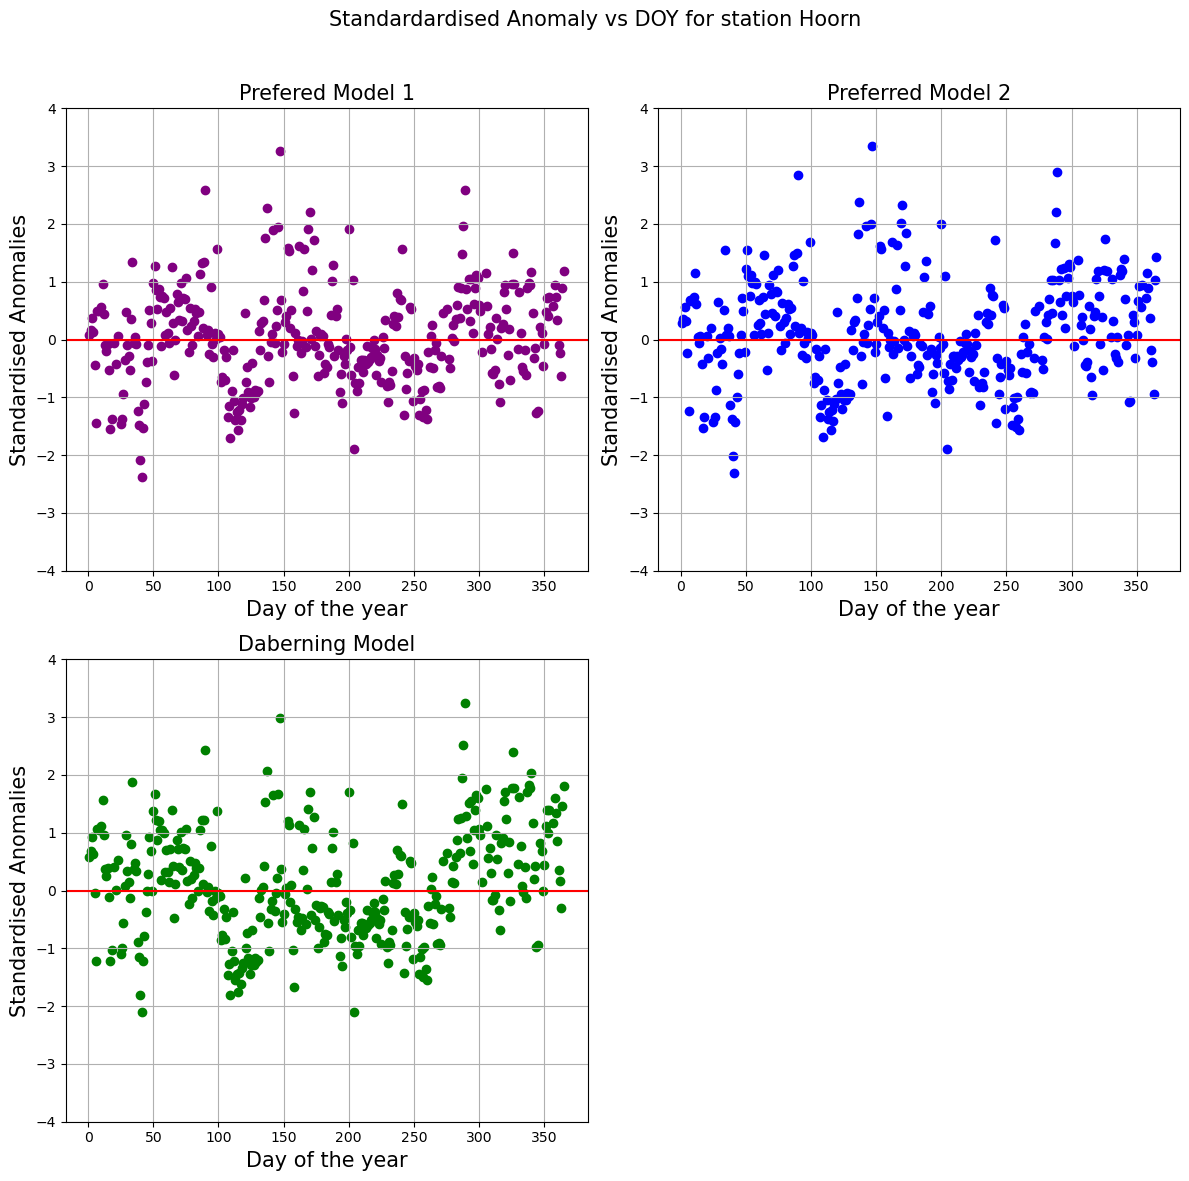

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12, 12])

ax1 = plt.subplot(2, 2, 1)
ax1.scatter(std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Vlieland']['DOY'], std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Vlieland']['std_anamoly'], color='purple')
ax1.axhline(y=0, color='red')
ax1.set_xlabel('Day of the year', size = 15)
ax1.set_ylabel('Standardised Anomalies', size = 15)
ax1.set_title('Prefered Model 1', size = 15)
ax1.set_ylim(-4, 4)
ax1.grid(True)

ax2 = plt.subplot(2, 2, 2)
ax2.scatter(std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Vlieland']['DOY'], std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Vlieland']['std_anamoly'], color='blue')
ax2.axhline(y=0, color='red')
ax2.set_xlabel('Day of the year',size = 15)
ax2.set_ylabel('Standardised Anomalies', size = 15)
ax2.set_title('Preferred Model 2',size = 15)
ax2.set_ylim(-4, 4)
ax2.grid(True)

ax3 = plt.subplot(2, 2, 3)
ax3.scatter(std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Vlieland']['DOY'], std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Vlieland']['std_anamoly'], color='green')
ax3.axhline(y=0, color='red')
ax3.set_xlabel('Day of the year',size = 15)
ax3.set_ylabel('Standardised Anomalies',size = 15)
ax3.set_title('Daberning Model',size = 15)
ax3.set_ylim(-4, 4)
ax3.grid(True)

plt.suptitle('Standardardised Anomaly vs DOY for station Vleiland', size = 15)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=[12, 12])

# ax1 = plt.subplot(2, 2, 1)
# ax1.scatter(std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Hannover']['DOY'], std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Hannover']['std_anamoly'], color='purple')
# ax1.axhline(y=0, color='red')
# ax1.set_xlabel('DOY')
# ax1.set_ylabel('Standard Anomaly')
# ax1.set_title('Prefered Model 1')
# ax1.set_ylim(-4, 4)
# ax1.grid(True)

# ax2 = plt.subplot(2, 2, 2)
# ax2.scatter(std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Hannover']['DOY'], std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Hannover']['std_anamoly'], color='blue')
# ax2.axhline(y=0, color='red')
# ax2.set_xlabel('DOY')
# ax2.set_ylabel('Standard Anomaly')
# ax2.set_title('Preferd Model 2')
# ax2.set_ylim(-4, 4)
# ax2.grid(True)

# ax3 = plt.subplot(2, 2, 3)
# ax3.scatter(std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Hannover']['DOY'], std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Hannover']['std_anamoly'], color='green')
# ax3.axhline(y=0, color='red')
# ax3.set_xlabel('DOY')
# ax3.set_ylabel('Standard Anomaly')
# ax3.set_title('Daberning')
# ax3.set_ylim(-4, 4)
# ax3.grid(True)

# plt.suptitle('Standardardised Anomaly vs DOY for station Hannover')
# plt.tight_layout(rect=[0, 0, 1, 0.96]) 
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=[12, 12])

# ax1 = plt.subplot(2, 2, 1)
# ax1.scatter(std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Braunschweig']['DOY'], std_anomalies_pref_model1[std_anomalies_pref_model1['station_name'] == 'Braunschweig']['std_anamoly'], color='purple')
# ax1.axhline(y=0, color='red')
# ax1.set_xlabel('DOY')
# ax1.set_ylabel('Standard Anomaly')
# ax1.set_title('Prefered Model 1')
# ax1.set_ylim(-4, 4)
# ax1.grid(True)

# ax2 = plt.subplot(2, 2, 2)
# ax2.scatter(std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Braunschweig']['DOY'], std_anomalies_pref_model2[std_anomalies_pref_model2['station_name'] == 'Braunschweig']['std_anamoly'], color='blue')
# ax2.axhline(y=0, color='red')
# ax2.set_xlabel('DOY')
# ax2.set_ylabel('Standard Anomaly')
# ax2.set_title('Preferd Model 2')
# ax2.set_ylim(-4, 4)
# ax2.grid(True)

# ax3 = plt.subplot(2, 2, 3)
# ax3.scatter(std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Braunschweig']['DOY'], std_anomalies_daberning_model[std_anomalies_daberning_model['station_name'] == 'Braunschweig']['std_anamoly'], color='green')
# ax3.axhline(y=0, color='red')
# ax3.set_xlabel('DOY')
# ax3.set_ylabel('Standard Anomaly')
# ax3.set_title('Daberning')
# ax3.set_ylim(-4, 4)
# ax3.grid(True)

# plt.suptitle('Standardardised Anomaly vs DOY for station Braunschweig')
# plt.tight_layout(rect=[0, 0, 1, 0.96]) 
# plt.show()


In [42]:
def predicted_values(df_result):
    import numpy as np
    import matplotlib.pyplot as plt

    y_pred_2 = df_result[df_result['station_name'] == 'Vlieland']['y_pred']
    y_actual_2 = df_result[df_result['station_name'] == 'Vlieland']['y_actual']
    doy_2 = df_result[df_result['station_name'] == 'Vlieland']['DOY']


    y_actual_1_aligned_all = y_actual_2.reindex(doy_2.index)
    y_pred_1_aligned_all = y_pred_2.reindex(doy_2.index)

    residuals_all = y_actual_1_aligned_all - y_pred_1_aligned_all

    standard_error_all = np.std(residuals_all)

    prediction_interval_width = 1.96  
    n = len(y_actual_1_aligned_all)
    margin_of_error_all = prediction_interval_width * standard_error_all * np.sqrt(1 + 1/n)

    y_pred_lower_all = y_pred_2 - margin_of_error_all
    y_pred_upper_all = y_pred_2 + margin_of_error_all
    return y_pred_lower_all, y_pred_upper_all

In [43]:
predicted_pref = predicted_values(df_result)
predicted_pref_model_2 = predicted_values(p5)
predicted_dab = predicted_values(df_result_dab)

In [ ]:
# import matplotlib.pyplot as plt

# def plot_with_ribbon(doy, y_actual, y_pred, y_pred_lower, y_pred_upper, title):
#     plt.figure(figsize=(10, 6))

#     # Convert temperatures from Kelvin to Celsius
#     y_actual = y_actual - 273.15
#     y_pred = y_pred - 273.15
#     y_pred_lower = y_pred_lower - 273.15
#     y_pred_upper = y_pred_upper - 273.15

#     plt.scatter(doy, y_actual, alpha=0.5, color='blue', label='Actual Values')
#     plt.plot(doy, y_pred, color='red', label='Predicted Values')
#     plt.fill_between(doy, y_pred_lower, y_pred_upper, color='pink', alpha=0.3, label='Prediction Interval')

#     plt.xlabel('Day of the Year')
#     plt.ylabel('2-meter Temperature (°C)') # Updated label to indicate Celsius
#     plt.title(title)
#     plt.legend()
#     plt.grid(True, linestyle='--', alpha=0.5)
#     plt.show()

# # Assuming the variables 'predicted_pref', 'predicted_dab', etc., are also temperatures in Kelvin
# # you can convert them to Celsius before calling the 'plot_with_ribbon' function:

# predicted_pref = [value - 273.15 for value in predicted_pref]
# predicted_dab = [value - 273.15 for value in predicted_dab]
# predicted_pref_model_2 = [value - 273.15 for value in predicted_pref_model_2]

# # Now you can call the function as before:

# # ... (other code as in your original example) ...


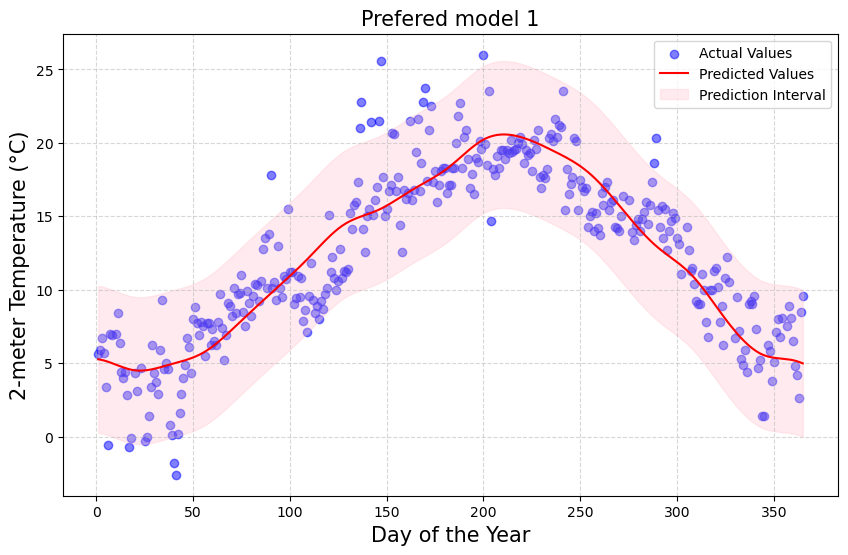

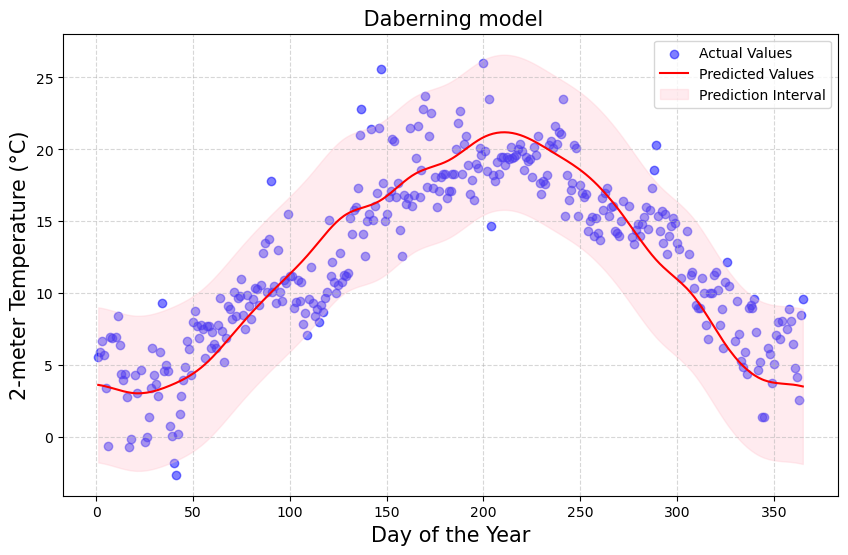

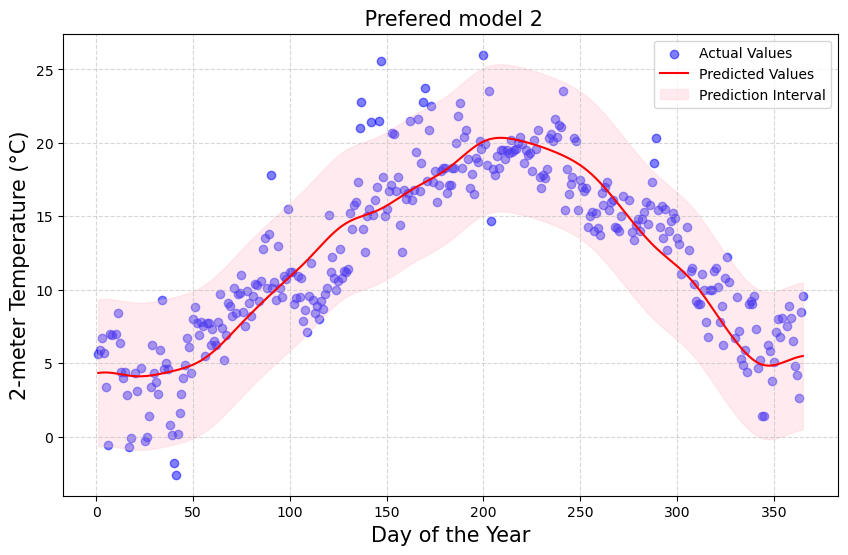

In [46]:
import matplotlib.pyplot as plt

def plot_with_ribbon(doy, y_actual, y_pred, y_pred_lower, y_pred_upper, title):
    plt.figure(figsize=(10, 6))

   
    plt.scatter(doy, y_actual, alpha=0.5, color='blue', label='Actual Values')
    plt.plot(doy, y_pred, color='red', label='Predicted Values')
    plt.fill_between(doy, y_pred_lower, y_pred_upper, color='pink', alpha=0.3, label='Prediction Interval')

    plt.xlabel('Day of the Year', size = 15)
    plt.ylabel('2-meter Temperature (°C)', size = 15)
    plt.title(title, size = 15)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5) 
    plt.show()
    
doy_1 = df_result[df_result['station_name'] == 'Vlieland']['DOY']
y_actual_1 = df_result[df_result['station_name'] == 'Vlieland']['y_actual'] - 273.15
y_pred_1 = df_result[df_result['station_name'] == 'Vlieland']['y_pred']- 273.15


plot_with_ribbon(doy_1, y_actual_1, y_pred_1, predicted_pref[0]- 273.15, predicted_pref[1]- 273.15, 'Prefered model 1')

doy_2 = df_result_dab[df_result_dab['station_name'] == 'Vlieland']['DOY']
y_actual_2 = df_result_dab[df_result_dab['station_name'] == 'Vlieland']['y_actual']- 273.15
y_pred_2 = df_result_dab[df_result_dab['station_name'] == 'Vlieland']['y_pred']- 273.15

plot_with_ribbon(doy_2, y_actual_2, y_pred_2, predicted_dab[0]- 273.15, predicted_dab[1]- 273.15, ' Daberning model')


doy_11 = p5[p5['station_name'] == 'Vlieland']['DOY']
y_actual_11 = p5[p5['station_name'] == 'Vlieland']['y_actual']- 273.15
y_pred_11 = p5[p5['station_name'] == 'Vlieland']['y_pred']- 273.15

plot_with_ribbon(doy_11, y_actual_11, y_pred_11, predicted_pref_model_2[0]- 273.15, predicted_pref_model_2[1]- 273.15, ' Prefered model 2')


In [ ]:
# import matplotlib.pyplot as plt

# feature_names = ['latitude', 'longitude', 'altitude', 'doy', 'latitude_doy', 'longitude_doy', 'altitude_doy']

# for term_idx, feature_name in enumerate(feature_names):
  
#     feature_values = np.linspace(X_train[:, term_idx].min(), X_train[:, term_idx].max(), 100)
#     partial_dep_values = []

#     for value in feature_values:
#         X_grid = X_train.copy()
#         X_grid[:, term_idx] = value
#         partial_dep = gam_preff.partial_dependence(term=term_idx, X=X_grid)
#         partial_dep_values.append(partial_dep.mean())
        
#     plt.plot(feature_values, partial_dep_values)
#     plt.xlabel(feature_name)
#     plt.ylabel('Partial Dependence')
#     plt.title(f'Partial Dependence Plot for {feature_name}')
#     plt.show()


In [ ]:
# combined_obs_mean.to_csv('combined_obs_mean.csv')
# combined_obs_std_dev.to_csv('combined_obs_std_dev.csv')
# combined_obs_test.to_csv('combined_obs_test.csv')

In [ ]:
# gam_preff.summary()

In [ ]:
# gam_pref2.summary()

In [ ]:
# gam_dab.summary()